<a href="https://colab.research.google.com/github/hyngon90/hello-world/blob/main/04_StatQuest_Tutorial_Word_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import torch
import torch.nn as nn

from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
from torch.distributions.uniform import Uniform

import lightning as L
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np


random.seed(42)
np.random.seed(42)
torch.random.manual_seed(42)

In [102]:
def drawPlot(df):
  sns.scatterplot(data=df, x="w1", y="w2")
  for i in range(len(df)):
    plt.text(df.w1[i], df.w2[i], df.Token[i],
             horizontalalignment = 'left',
             size = 'medium',
             color = 'black',
             weight = 'semibold')

In [103]:

class WordEmbeddingFromScratch(L.LightningModule):
  def __init__(self):
    super().__init__()
    self.learning_rate = 0.1

    self.min_value = -0.5
    self.max_value = +0.5

    self.input_1_w_1 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())
    self.input_1_w_2 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())
    self.input_2_w_1 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())
    self.input_2_w_2 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())
    self.input_3_w_1 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())
    self.input_3_w_2 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())
    self.input_4_w_1 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())
    self.input_4_w_2 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())

    self.output_1_w_1 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())
    self.output_1_w_2 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())
    self.output_2_w_1 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())
    self.output_2_w_2 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())
    self.output_3_w_1 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())
    self.output_3_w_2 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())
    self.output_4_w_1 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())
    self.output_4_w_2 = nn.Parameter(Uniform(self.min_value, self.max_value).sample())

    self.loss = nn.CrossEntropyLoss()

  def forward(self, input):

    input =input[0]
    input_1 = input[0]
    input_2 = input[1]
    input_3 = input[2]
    input_4 = input[3]

    top_hidden = input_1 * self.input_1_w_1 + input_2 * self.input_2_w_1 + input_3 * self.input_3_w_1 + input_4 * self.input_4_w_1
    bot_hidden = input_1 * self.input_1_w_2 + input_2 * self.input_2_w_2 + input_3 * self.input_3_w_2 + input_4 * self.input_4_w_2

    output_1 = top_hidden * self.output_1_w_1 + bot_hidden * self.output_1_w_2
    output_2 = top_hidden * self.output_2_w_1 + bot_hidden * self.output_2_w_2
    output_3 = top_hidden * self.output_3_w_1 + bot_hidden * self.output_3_w_1
    output_4 = top_hidden * self.output_4_w_1 + bot_hidden * self.output_4_w_1

    ret_val = torch.stack([output_1, output_2, output_3, output_4])

    return ret_val

  def configure_optimizers(self):

    return Adam(self.parameters(), lr=self.learning_rate)

  def training_step(self, batch, batch_idx):
    input, label = batch
    output = self(input)
    loss = self.loss(output, label[0])

    return loss

  def makedf(self):
    data1 = {
      "w1":[self.input_1_w_1.item(), self.input_2_w_1.item(), self.input_3_w_1.item(), self.input_4_w_1.item()],
      "w2":[self.input_1_w_2.item(), self.input_2_w_2.item(), self.input_3_w_2.item(), self.input_4_w_2.item()],
      "Token":["Troll2", "is", "great", "Gymkata"],
      "input":["input1", "input2", "input3", "input4"],
    }
    df1 = pd.DataFrame(data1)
    return df1

In [104]:
class WordEmbeddingWithLinear(L.LightningModule):
  def __init__(self):
    super().__init__()
    self.learning_rate = 0.1

    self.input_to_hidden = nn.Linear(in_features=4, out_features=2, bias = False)
    self.hidden_to_output = nn.Linear(in_features=2, out_features=4, bias = False)

    self.loss = nn.CrossEntropyLoss()

  def forward(self, input):

    hidden = self.input_to_hidden(input)
    output = self.hidden_to_output(hidden)

    return output

  def configure_optimizers(self):

    return Adam(self.parameters(), lr=self.learning_rate)

  def training_step(self, batch, batch_idx):
    input, label = batch
    output = self(input)
    loss = self.loss(output, label)

    return loss

  def makedf(self):
    data2 = {
      "w1":self.input_to_hidden.weight.detach()[0].numpy(),
      "w2":self.input_to_hidden.weight.detach()[1].numpy(),
      "Token":["Troll2", "is", "great", "Gymkata"],
      "input":["input1", "input2", "input3", "input4"],
    }
    df2 = pd.DataFrame(data2)
    return df2

In [105]:
inputs = torch.tensor([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]])
lables = torch.tensor([[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 0.0]])
dataset = TensorDataset(inputs, lables)
dataloader = DataLoader(dataset)

trainer1 = L.Trainer(max_epochs=100)
trainer2 = L.Trainer(max_epochs=100)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO: 
  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | loss         | CrossEntropyLoss | 0      | train
  | other params | n/a              | 16     | n/a  
----------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | loss         | CrossEntropyLoss | 0      | train
  | other params | n/a              | 16     | n/a  
----------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode
/usr/

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO: 
  | Name             | Type             | Params | Mode 
--------------------------------------------------------------
0 | input_to_hidden  | Linear           | 8      | train
1 | hidden_to_output | Linear           | 8      | train
2 | loss             | CrossEntropyLoss | 0      | train
--------------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name             | Type             | Params | Mode 
--------------------------------------------------------------
0 | input_to_hidden  | Linear           | 8      | train
1 | hidden_to_output | Linear           | 8      | train
2 | loss         

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


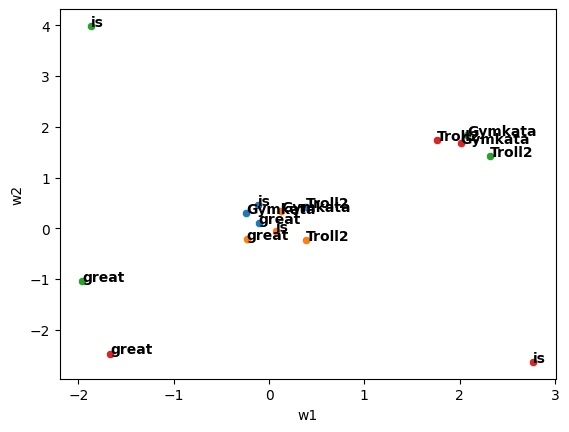

In [106]:
W1 = WordEmbeddingFromScratch()
W2 = WordEmbeddingWithLinear()

df_before1 = W1.makedf()
df_before2 = W2.makedf()
drawPlot(df_before1)
drawPlot(df_before2)

trainer1.fit(W1, train_dataloaders=dataloader)
trainer2.fit(W2, train_dataloaders=dataloader)

df_after1 = W1.makedf()
df_after2 = W2.makedf()
drawPlot(df_after1)
drawPlot(df_after2)
plt.show()




In [119]:
word_embeddings = nn.Embedding.from_pretrained(W2.input_to_hidden.weight.T)
#function : word to embeddings
vocab = {"Troll": 0, "is": 1, "great": 2, "Gymkata":3}
word_embeddings(torch.tensor(vocab["great"]))

tensor([-1.6691, -2.4658])